In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import math as m
import datetime
from datetime import datetime

In [ ]:
df_f = pd.read_csv(r"C:\Users\gurzh\Downloads\facebook_ads_data (2.0).csv")
df_f.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [128]:
df_f['ad_date'] = pd.to_datetime(df_f['ad_date'])


In [ ]:
# Task 1.1   Графік з щоденною сумою витрат на рекламу в 2021 році;

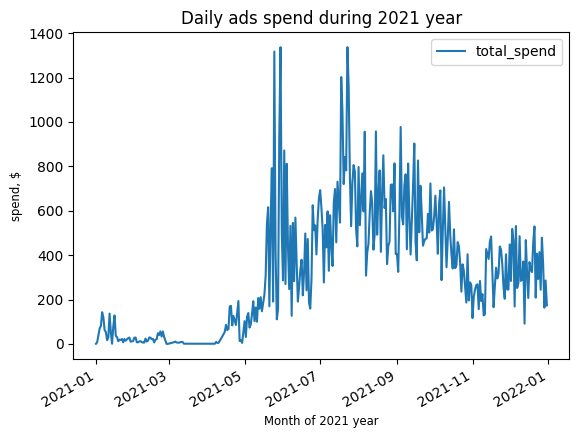

In [ ]:
import matplotlib.dates as mdates

daily_spend = df_f[(df_f['ad_date'] >= '2021-01-01') & (df_f['ad_date'] <= '2021-12-31')]
#daily_spend[daily_spend['ad_date'] > '2021-12-31']

daily_spend = daily_spend.groupby('ad_date', as_index=False)['total_spend'].sum()


plt.plot('ad_date', 'total_spend', data=daily_spend)
plt.xticks(rotation=45) 
plt.legend()
plt.title('Daily ads spend during 2021 year')
plt.xlabel('Month of 2021 year', fontsize='small')
plt.ylabel('spend, $', fontsize='small')
plt.gcf().autofmt_xdate()  # Автоподгонка меток по оси X
plt.show()

In [ ]:
# Task 1.2   Графік з щоденним ROMI в 2021 році.

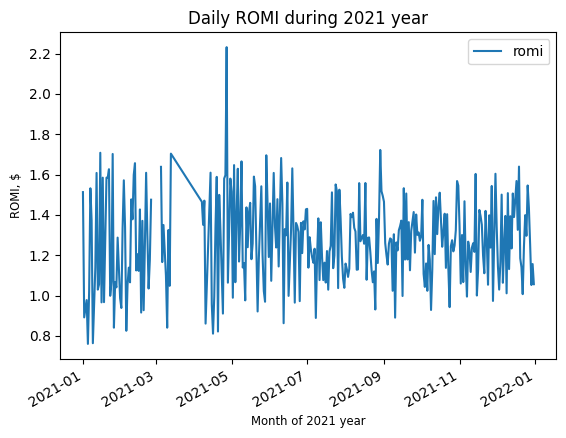

In [99]:
daily_spend1 = df_f[(df_f['ad_date'] >= '2021-01-01') & (df_f['ad_date'] <= '2021-12-31')]
daily_spend1 = daily_spend1.groupby('ad_date', as_index=False)[['total_spend', 'total_value']].sum()
daily_spend1['romi'] = daily_spend1['total_value']/daily_spend1['total_spend']
plt.plot('ad_date', 'romi', data=daily_spend1)

plt.title('Daily ROMI during 2021 year')
plt.xlabel('Month of 2021 year', fontsize='small')
plt.ylabel('ROMI, $', fontsize='small')
plt.gcf().autofmt_xdate()  # Автоподгонка меток по оси X
# daily_spend1['rolling_mean_spend'] = daily_spend1['total_spend'].rolling(window=7).mean()
# daily_spend1['rolling_mean_romi'] = daily_spend1['romi'].rolling(window=7).mean()

# plt.plot('ad_date', 'rolling_mean_spend', data=daily_spend1, label='7-day Rolling Total spend Mean', color='red')

# plt.plot('ad_date', 'romi', data=daily_spend1, label='7-day Romi Rolling Mean', color='green')
plt.legend()
plt.show()



In [ ]:
 # Bonus task 1. Бонусне завдання: застосуй метод rolling() щоб відобразити рухоме середнє витрат та ROMI

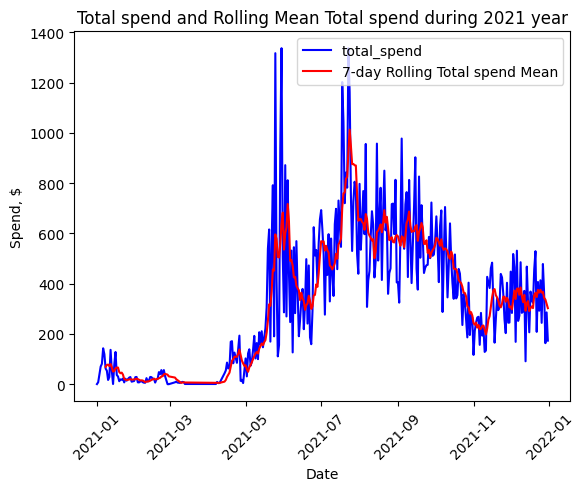

In [112]:
daily_spend1['rolling_mean_spend'] = daily_spend1['total_spend'].rolling(window=7).mean()
plt.plot('ad_date', 'total_spend', data=daily_spend1, color='b')
plt.plot('ad_date', 'rolling_mean_spend', data=daily_spend1,  label='7-day Rolling Total spend Mean', color='r')
plt.title('Total spend and Rolling Mean Total spend during 2021 year')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Spend, $')
plt.legend()
plt.show()

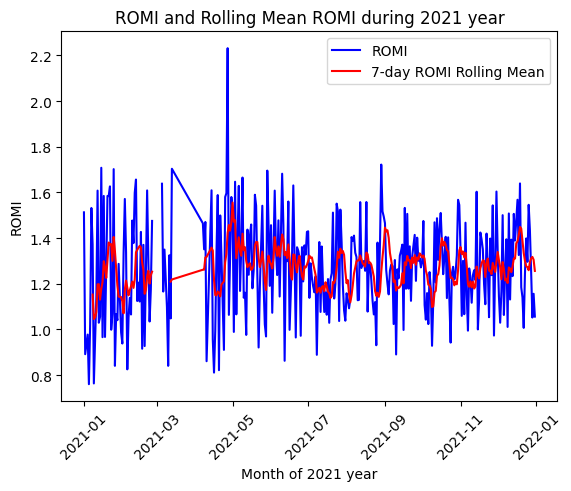

In [111]:
daily_spend1['rolling_mean_romi'] = daily_spend1['romi'].rolling(window=7).mean()
plt.plot('ad_date', 'romi', data=daily_spend1, label='ROMI', color='b')
plt.plot('ad_date', 'rolling_mean_romi', data=daily_spend1,  label='7-day ROMI Rolling Mean', color='r')
plt.title('ROMI and Rolling Mean ROMI during 2021 year')
plt.xlabel('Month of 2021 year')
plt.xticks(rotation=45)
plt.ylabel('ROMI')
plt.legend()
plt.show()

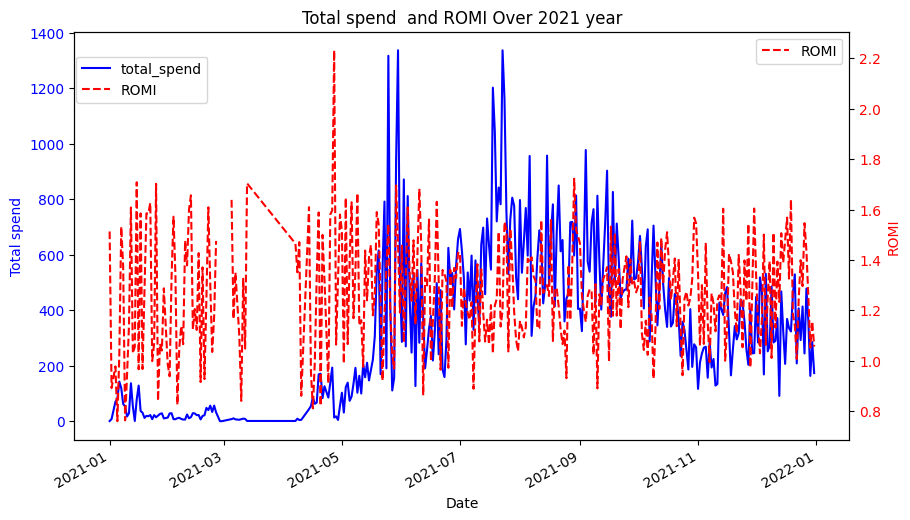

In [120]:
#   Пробую с двумя осями
daily_spend1 = df_f[(df_f['ad_date'] >= '2021-01-01') & (df_f['ad_date'] <= '2021-12-31')]
daily_spend1 = daily_spend1.groupby('ad_date', as_index=False)[['total_spend', 'total_value']].sum()
daily_spend1['romi'] = daily_spend1['total_value']/daily_spend1['total_spend']
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(daily_spend1['ad_date'], daily_spend1['total_spend'], 'b-', label='total_spend')
ax1.set_xlabel('Date') 
ax1.set_ylabel('Total spend', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(daily_spend1['ad_date'], daily_spend1['romi'], 'r--', label='ROMI')
ax2.set_ylabel('ROMI', color='r')
ax2.tick_params(axis='y', labelcolor='r') 
fig.legend(loc="upper left", bbox_to_anchor=(0.12, 0.85))
plt.title('Total spend  and ROMI Over 2021 year')
plt.gcf().autofmt_xdate() 

plt.legend()
plt.show()

In [ ]:
# Bonus task 2.1   Графік загальної суми витрат на рекламу в кожній з кампаній;

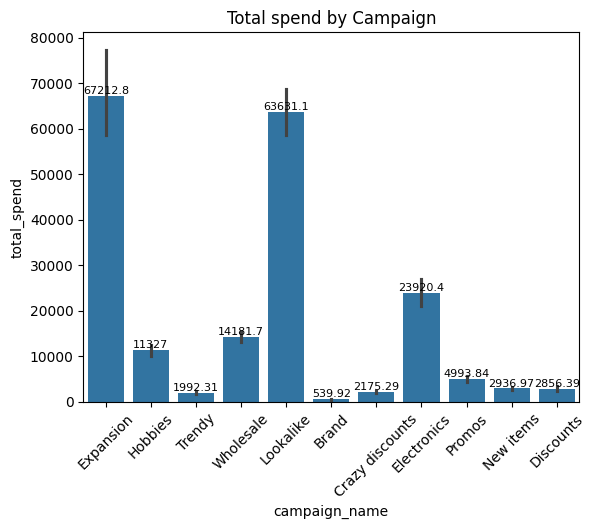

In [149]:
ax=sns.barplot(df_f, x='campaign_name', y='total_spend', estimator='sum')
ax.bar_label(ax.containers[0], fontsize=8)
plt.xticks(rotation=45)
plt.title('Total spend by Campaign')
plt.show()


In [ ]:
# Bonus task 2.2 Загальний ROMI в кожній з кампаній.

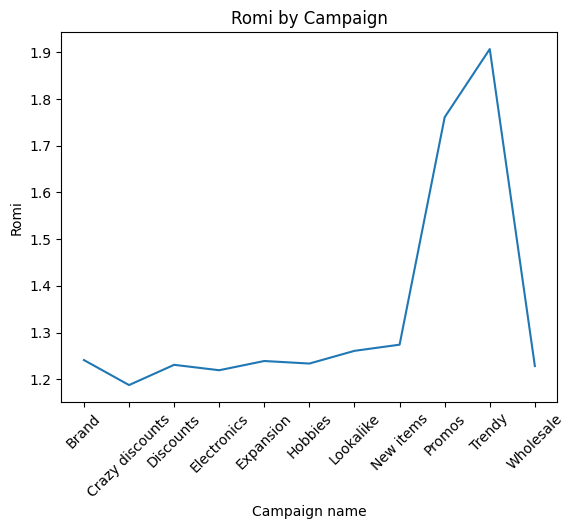

In [154]:
campaign_grouped = df_f.groupby('campaign_name', as_index=False)[['total_spend', 'total_impressions' , 'total_clicks',  'total_value' ]].sum()
campaign_grouped['romi'] = campaign_grouped['total_value'] / campaign_grouped['total_spend']
plt.plot('campaign_name', 'romi', data=campaign_grouped, label='Romi by Campaign')
plt.xlabel('Campaign name')
plt.ylabel('Romi')
plt.xticks(rotation=45)
plt.title('Romi by Campaign')
plt.show()



In [ ]:
# Bonus task 3.За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

<Axes: xlabel='romi', ylabel='campaign_name'>

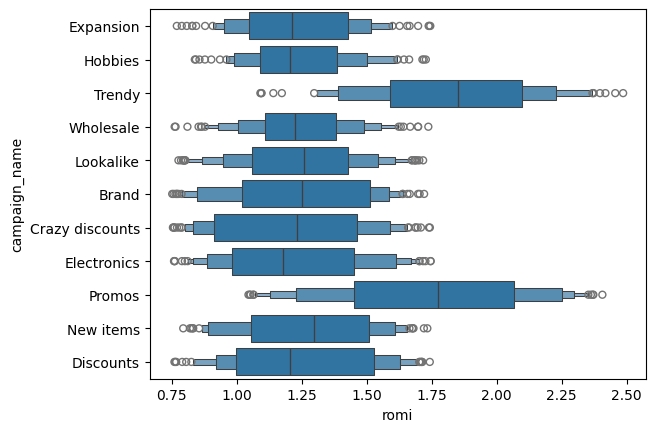

In [155]:
sns.boxenplot(df_f, x='romi', y='campaign_name')

<Axes: xlabel='romi', ylabel='campaign_name'>

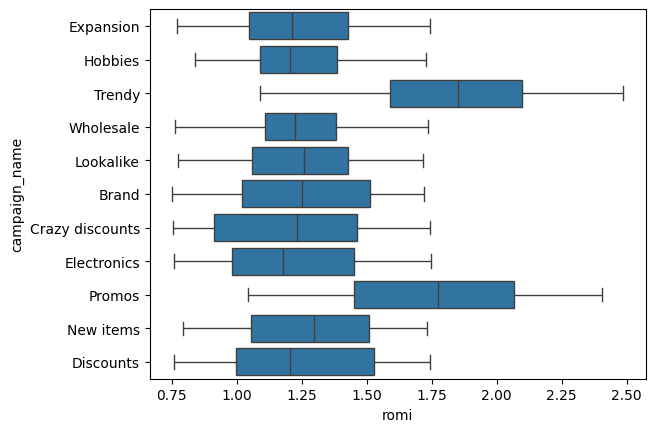

In [156]:
sns.boxplot(df_f, x='romi', y='campaign_name')

Text(0.5, 1.0, 'Romi distribution')

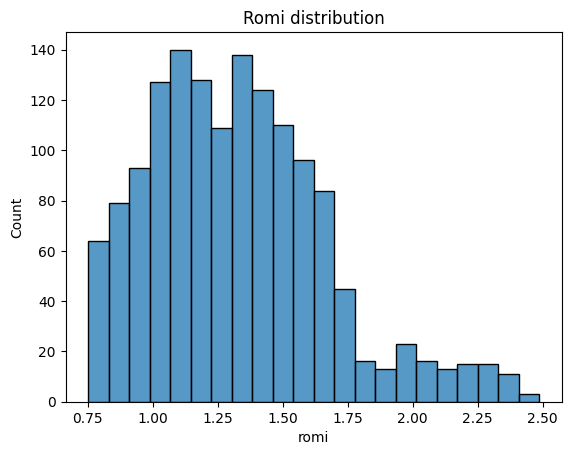

In [ ]:
# Bonus Tsk 4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

sns.histplot(df_f, x='romi')
plt.title('Romi distribution')

In [ ]:
# Bonus Task 5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

<Axes: >

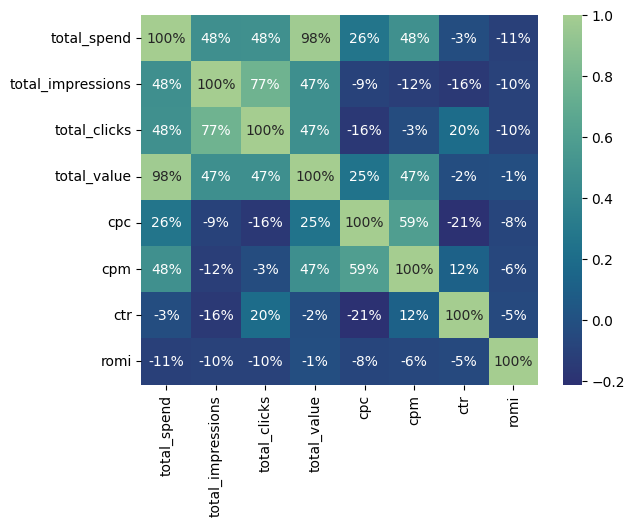

In [175]:
df_corr = df_f.loc[:, 'total_spend':].corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, fmt='.0%', cmap='crest_r')

# """ Высокая корреляция наблюдается между расходами на рекламу и вырученными средствами (otal_value коррелирует с total_spend )/  
# Корреляция в районе 0,5 наблюдается между показами и расходами, а также покахами и кликами. 
# Такой же показатель корреляции между полученными средствами и показами и кликами. 
# T""""

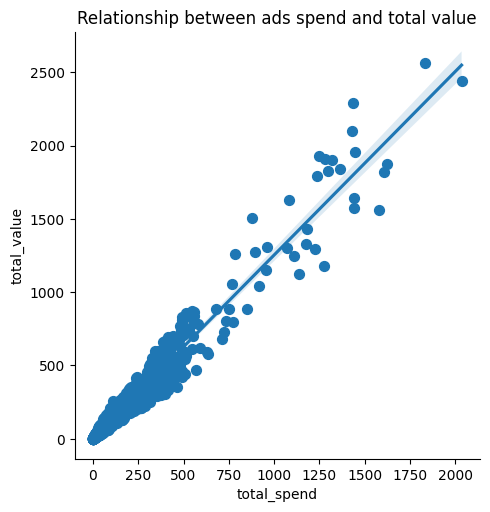

In [169]:
# Bonus task 6. Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.

from numpy import median

sns.lmplot(df_f, x='total_spend', y='total_value', x_estimator=median)
plt.title('Relationship between ads spend and total value')
plt.show()